In [1]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
# pd.set_option('display.float_format', lambda x: '%.3e' % x)
import matplotlib.pyplot as plt 

In [2]:
# define a general function to implement the bijection method 
def bisection( f , ini_xl:float , ini_xr:float , max_itr:int = 10 , tolerance:float = 1e-2 ) : 
    '''
    param f: function f to apply bijection mehtod on. 
    param ini_xl: initial left guess of the solution. 
    param ini_xr: initial right guess of the soultion. 
    param max_itr: maximum num of iteration the method to run for. 
    param tolerance: max allowed error (absolute relative approximate error). 
    var xl: list of all the left gusses. 
    var xr: list of all the right gusses. 
    var xm: list of the current guess for the solution, middle point of the current range. 
    var err: list of the error for each iteration, first entry is None. 
    '''
    # Ensures that the function changes sign within the range 
    if( f(ini_xr)*f(ini_xl) >= 0 ): 
        raise ValueError('The two initital guesses have the same functional sign.' )
    
    if( ini_xl >= ini_xr ): 
        raise ValueError('The left guess should be strictly smaller than the right one.')
    
    xl , xr , xm, err = [ini_xl] , [ini_xr] , [(ini_xr+ini_xl)/2] , [None]
    fxm = [f( xm[-1]) ]
    itr = 0 # keeps trak of the iterations : 
    
    while( itr < max_itr -1  and (err[-1] == None or err[-1] > tolerance ) ): 
        if( f( xl[-1] )*f( xm[-1] ) < 0 ): 
            xr.append( xm[-1] )
            xl.append( xl[-1] )
        else:     
            xl.append( xm[-1] )
            xr.append( xr[-1] )
        xm.append( ( xl[-1] + xr[-1] )/2 )
        err.append( abs((xm[-1]-xm[-2])/xm[-1])*100 )
        fxm.append( f( xm[-1] ) )
        itr += 1 
    
    if( itr == max_itr ): 
        print('-------Reached Max Iterations Limit---------')
    
    # stack the lists into one matrix : 
    data = np.stack((xl,xr,xm,err,fxm) , axis = 1)
    # convert the matrix into a pandas data frame 
    data = pd.DataFrame( data , columns = ['Xl' , 'Xr' , 'Xm' , 'Error %' , 'f(Xm)'] )
    
    #return the solution guess and the dataframe : 
    return xm[-1] , data     

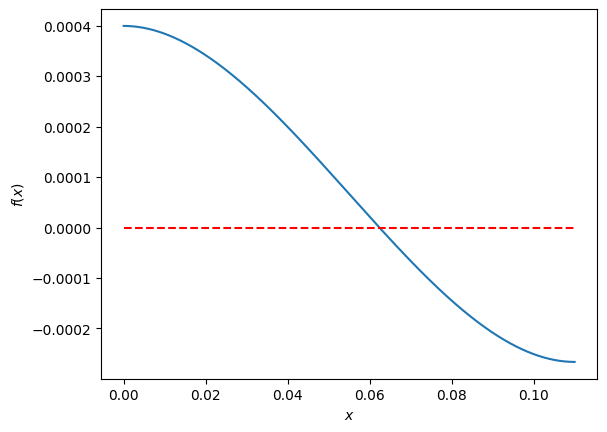

In [3]:
# Define the function : 
f = lambda x : x**3 - 0.165*(x**2) + 3.993*1e-4 
# for x in 0 to 0.11 

# let us print the function : 
xl , xr = 0 , 0.11 
x = np.linspace( xl , xr  , 10000 )
plt.plot( x , f( x ) )
plt.hlines( y = [0] , xmin = xl , xmax = xr , linestyles='--' , colors='r')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()
# we indeed have a solution between xl and xr and the function clearly had different signs between these points ! 

In [4]:
result , data = bisection( f , xl , xr )

In [5]:
result

0.06241210937500001

In [6]:
data.to_csv('Ashmit_Bathla_A_1_Output.csv' , na_rep='---' , index_label='Iteration' , )

In [7]:
data 

,Xl,Xr,Xm,Error %,f(Xm)
0,0.0,0.11,0.055,None,0.000067
1,0.055,0.11,0.0825,33.333333,-0.000162
2,0.055,0.0825,0.06875,20.0,-0.000056
3,0.055,0.06875,0.061875,11.111111,0.000004
4,0.061875,0.06875,0.065312,5.263158,-0.000026
5,0.061875,0.065312,0.063594,2.702703,-0.000011
6,0.061875,0.063594,0.062734,1.369863,-0.000003
7,0.061875,0.062734,0.062305,0.689655,0.000001
8,0.062305,0.062734,0.06252,0.343643,-0.000001
9,0.062305,0.06252,0.062412,0.172117,-0.0


In [8]:
data.style.format({'f(Xm)': "{:.4e}" })

,Xl,Xr,Xm,Error %,f(Xm)
0,0.000000,0.110000,0.055000,None,6.6550e-05
1,0.055000,0.110000,0.082500,33.333333,-1.6222e-04
2,0.055000,0.082500,0.068750,20.000000,-5.5632e-05
3,0.055000,0.068750,0.061875,11.111111,4.4843e-06
4,0.061875,0.068750,0.065312,5.263158,-2.5939e-05
5,0.061875,0.065312,0.063594,2.702703,-1.0804e-05
6,0.061875,0.063594,0.062734,1.369863,-3.1768e-06
7,0.061875,0.062734,0.062305,0.689655,6.4973e-07
8,0.062305,0.062734,0.062520,0.343643,-1.2646e-06
9,0.062305,0.062520,0.062412,0.172117,-3.0768e-07


In [9]:
result , data = bisection( f , 0.1 , xr )

ValueError: The two initital guesses have the same functional sign.

In [ ]:
result , data = bisection( f , xr , xl  )

ValueError: The left guess should be strictly smaller than the right one.